# Logistic Regression

## What is Logistic Regression?
Logistic Regression is used when we want to **classify** things into **categories** such as Yes/No, Pass/Fail, or Spam/Not Spam.

- It outputs probabilities.
- Uses an S-shaped curve called **sigmoid**.
- It is different from linear regression which predicts continuous values.

## Sigmoid Function

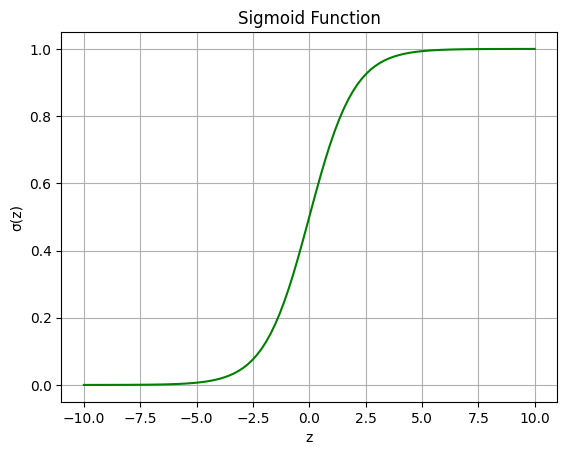

In [13]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid, color='green')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()

## Logistic Regression on Iris Dataset (2 Classes Only)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Load the iris dataset
iris = load_iris()
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[13  0]
 [ 0 12]]


## Confusion Matrix Explained
- **True Positive (TP):** Predicted Yes, Actual Yes
- **True Negative (TN):** Predicted No, Actual No
- **False Positive (FP):** Predicted Yes, Actual No
- **False Negative (FN):** Predicted No, Actual Yes

In [15]:
!pip install statsmodels

In [16]:
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_iris

# Load dataset and prepare binary classification
iris = load_iris()
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]

# Convert to DataFrame for statsmodels
X = pd.DataFrame(X, columns=iris.feature_names)
X = sm.add_constant(X)  # Adds intercept term - 
                       #statsmodels does not add intercept (bias term) by default, 
                       # so we must manually add it.
y = pd.Series(y)

# Build model
model = sm.Logit(y, X)  # Logit model for binary logistic regression
result = model.fit()

# Summary like your screenshot
print(result.summary())


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Wed, 04 Jun 2025   Pseudo R-squ.:                   1.000
Time:                        12:17:29   Log-Likelihood:            -8.9814e-06
converged:                      False   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 5.547e-29
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.6813    1.2e+04      0.001      0.999   -2.35e+04    2.35e+04
sepal length (cm)    -4.1173   3316.583     

c:\Users\hii\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\hii\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Output Explanation:
- coef: Estimated coefficients for each variable

- std err: Standard error of the coefficients

- z: z-score (test statistic)

- P>|z|: p-value (tests if coef is significantly different from 0)

- [0.025 0.975]: 95% confidence interval for each coefficient

- Pseudo R-squared: An analog of R² for logistic regression

- LLR p-value: Likelihood ratio test p-value (tests full model vs intercept-only)

## Cost Function - Log Loss
We use **Log Loss** to measure how well the model predicts probabilities.

### Formula:
$$ \text{Log Loss} = -[y \log(p) + (1 - y) \log(1 - p)] $$

Where:
- `y` is the actual class (0 or 1)
- `p` is the predicted probability

## Summary
- Logistic Regression is for classification
- Outputs probabilities using sigmoid
- Works well with binary (2-class) problems
- We evaluate it using accuracy and confusion matrix

## Logistic Regression for Multiple Classes

Logistic regression can also handle **more than two classes**. This is called **multiclass classification**.

- In the Iris dataset, we have 3 flower types:
  - Setosa (0)
  - Versicolor (1)
  - Virginica (2)

To handle this, logistic regression uses:
- **One-vs-Rest (OvR)**: Train a separate model for each class vs all others.
- Or **Softmax** (in multinomial setting).


## Summary

- Logistic Regression works for both **binary** and **multiclass** problems.
- It uses **sigmoid** or **softmax** functions.
- We visualize results using **decision boundaries** when working with 2D data.
- The Iris dataset is perfect for experimenting with 2-class or 3-class classification.


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # use only 2 features for easy 2D visualization
y = iris.target



In [18]:
# Train the Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
model.fit(X, y)



c:\Users\hii\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='ovr')

- multi_class='ovr' : Stands for One-vs-Rest strategy.Useful for multi-class classification (like the Iris dataset, which has 3 classes: 0, 1, 2).

- solver='lbfgs': The optimization algorithm used to minimize the loss function.'lbfgs' is a fast, efficient solver that works well for small datasets and supports L2 regularization.



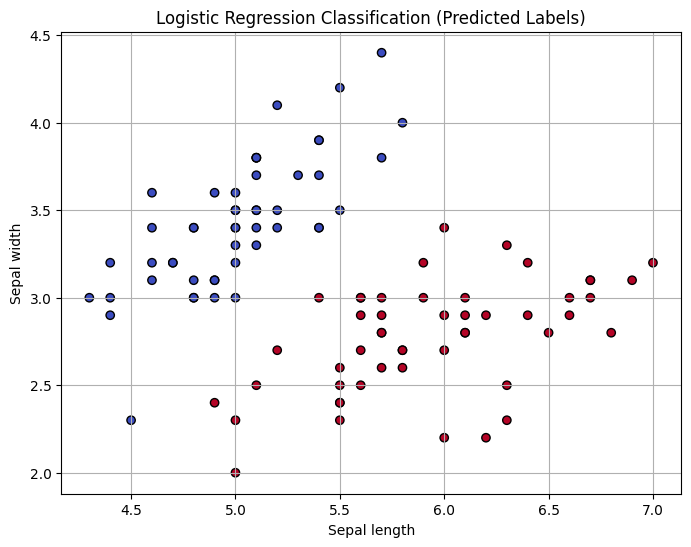

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load Iris data and take only two features
iris = load_iris()
X = iris.data[:, :2]  # Use only first 2 features
y = iris.target

# Binary classification only (class 0 and 1)
X = X[y != 2]
y = y[y != 2]

# Train model
model = LogisticRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Logistic Regression Classification (Predicted Labels)')
plt.grid(True)
plt.show()


In [20]:
# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



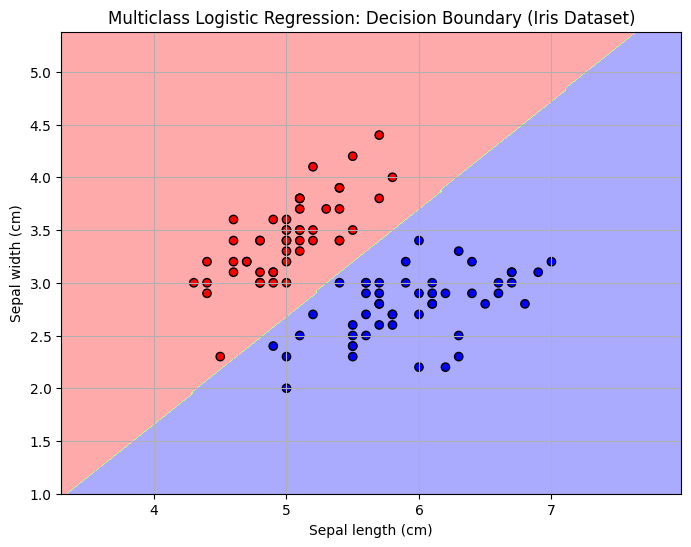

In [21]:
# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k',
            cmap=ListedColormap(['red', 'green', 'blue']))
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Multiclass Logistic Regression: Decision Boundary (Iris Dataset)')
plt.grid(True)
plt.show()
